<a href="https://colab.research.google.com/github/sarabert96/Colexification/blob/main/06_Analysis_Bootstrapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pickle
import pandas as pd

In [ ]:
!gdown --id 1tu36NAL3MyHMkajE7wEDffbF0OI5fidY #listBoot
# bootstrappping with 3 as number of cicle

Downloading...
From: https://drive.google.com/uc?id=1tu36NAL3MyHMkajE7wEDffbF0OI5fidY
To: /content/listBoot.txt
6.36MB [00:00, 17.5MB/s]


In [ ]:
with open("listBoot.txt", "rb") as fp:   # Unpickling
  lBoot = pickle.load(fp)

In [ ]:
df_colex_prob = pd.DataFrame(lBoot[0], columns=['Colex_pair', 'Prob']) # to save in df


In [ ]:
df_colex_prob.head(2)

,Colex_pair,Prob
0,"(a little, what)",0.000131
1,"(above, black)",0.000060


In [ ]:
df_colex_prob['Prob'].describe()

count    36904.000000
mean         0.002031
std          0.006255
min          0.000016
25%          0.000044
50%          0.000197
75%          0.001381
max          0.189023
Name: Prob, dtype: float64

In [ ]:
df_colex_prob['Prob']=df_colex_prob['Prob']*100

In [ ]:
df_colex_prob['Prob'] = round(df_colex_prob['Prob'], 3)

In [ ]:
df_colex_prob['Prob'].describe()

count    36904.000000
mean         0.202954
std          0.625527
min          0.002000
25%          0.004000
50%          0.020000
75%          0.138000
max         18.902000
Name: Prob, dtype: float64

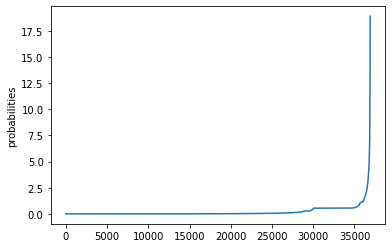

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sorted(list(df_colex_prob['Prob'])))
plt.ylabel('probabilities')
plt.show()

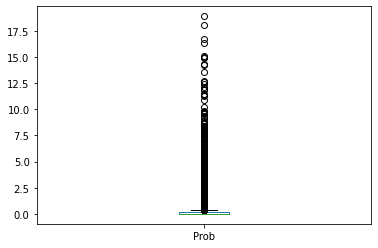

In [ ]:
ax = df_colex_prob.plot.box()

In [ ]:
topTwenty = sorted(list(df_colex_prob['Prob']))[-20]

Obtaining the value of the top twenties colexifications

In [ ]:
df_colex_prob[df_colex_prob['Prob']>topTwenty]

,Colex_pair,Prob
682,"(arm, hand)",14.249
3095,"(blue, green)",12.462
8439,"(dish, plate)",15.095
11102,"(fingernail, claw)",14.304
11736,"(flesh, meat)",16.309
12131,"(foot, leg)",11.474
14007,"(grandson, granddaughter)",16.717
15044,"(hear, listen)",14.946
15347,"(high, tall)",11.266
15976,"(how many pieces, how much)",12.692


histogram with 5% fasce

In [ ]:
import matplotlib.pyplot as plt

(array([3.6372e+04, 3.2900e+02, 1.1200e+02, 4.1000e+01, 2.3000e+01,
        9.0000e+00, 8.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([2.0000e-03, 1.8920e+00, 3.7820e+00, 5.6720e+00, 7.5620e+00,
        9.4520e+00, 1.1342e+01, 1.3232e+01, 1.5122e+01, 1.7012e+01,
        1.8902e+01]),
 <a list of 10 Patch objects>)

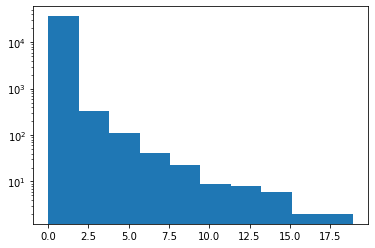

In [ ]:
plt.hist(data, log = True)

In [ ]:
# code by https://towardsdatascience.com/advanced-histogram-using-python-bceae288e715

def smartHist (data):
  import matplotlib.pyplot as plt
  from matplotlib.patches import Rectangle
  import numpy as np

  # Take data
  #data = df_colex_prob['Prob']

  # Plot the Histogram from the data
  fig, ax = plt.subplots(figsize=(8, 8))

  '''
  counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
  bins    = numpy.ndarray of bin edge/range values
  patches = a list of Patch objects.
          each Patch object contains a Rectnagle object. 
          e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
  '''
  counts, bins, patches = ax.hist(data, edgecolor='gray', log = True)


  # Set the ticks to be at the edges of the bins.
  ax.set_xticks(bins.round(2))
  plt.xticks(rotation=70)

  # Set the graph title and axes titles
  plt.title('Distribution of probabilities', fontsize=20)
  plt.ylabel('Count', fontsize=15)
  plt.xlabel('Probabilities', fontsize=15)
          
  # Calculate bar centre to display the count of data points and %
  #bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
  #bin_y_centers = ax.get_yticks()[1] * 0.25
  bin_x_centers = 0.75 * np.diff(bins) + bins[:-1]
  bin_y_centers = ax.get_yticks()[1] * 5

  # Display the the count of data points and % for each bar in histogram
  for i in range(len(bins)-1):
      bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
      plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

  # Display the graph
  plt.show()

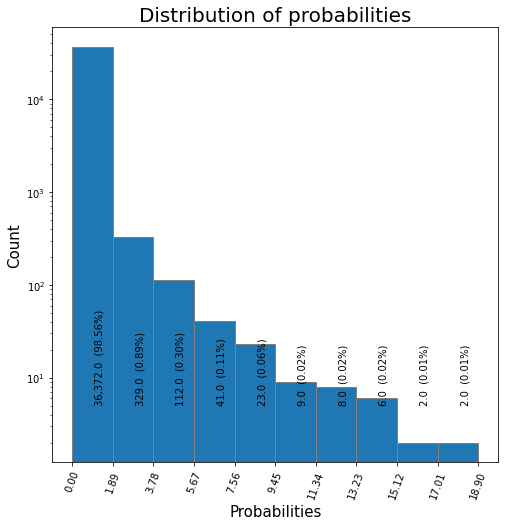

In [ ]:
smartHist (df_colex_prob['Prob'])

Check visually whether to take 5 or 2%

In [ ]:
df_colex_prob1 = pd.DataFrame(lBoot[1], columns=['Colex_pair', 'Prob']) # to save in df
df_colex_prob1['Prob']=df_colex_prob1['Prob']*100
df_colex_prob1['Prob'] = round(df_colex_prob1['Prob'], 3)

df_colex_prob2 = pd.DataFrame(lBoot[2], columns=['Colex_pair', 'Prob']) # to save in df
df_colex_prob2['Prob']=df_colex_prob2['Prob']*100
df_colex_prob2['Prob'] = round(df_colex_prob2['Prob'], 3)

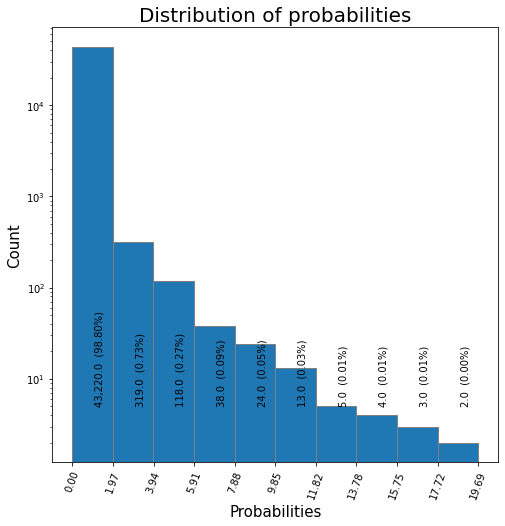

In [ ]:
smartHist (df_colex_prob1['Prob'])

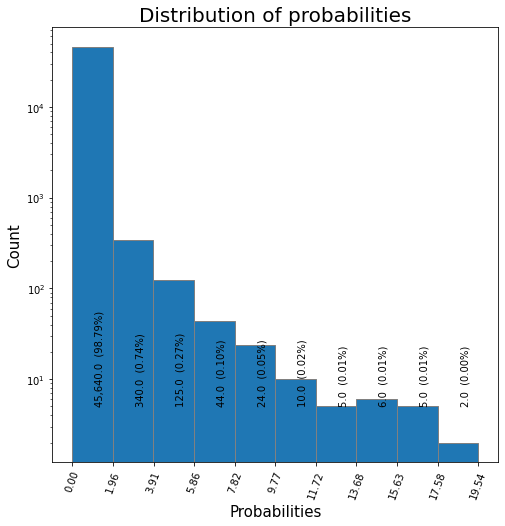

In [ ]:
smartHist (df_colex_prob2['Prob'])

In [ ]:
!gdown --id 1vTgCbYTHUpEmKPfB8asRYCe-olek65i0 #df_colex_cosines

Downloading...
From: https://drive.google.com/uc?id=1vTgCbYTHUpEmKPfB8asRYCe-olek65i0
To: /content/df_colex_cosines.csv
13.4MB [00:00, 36.8MB/s]


In [ ]:
df_cosine = pd.read_csv('df_colex_cosines.csv')

In [ ]:
df_colex_prob.head(5)

,Colex_pair,Prob
0,"(a little, what)",0.013
1,"(above, black)",0.006
2,"(above, cloud)",0.008
3,"(above, deer)",0.046
4,"(above, dig)",0.552


In [ ]:
df_cosine.head(5)

,Unnamed: 0,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
0,0,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,1927,bamboo,0.250825,"('gold', 'bamboo')"
1,1,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,946,blood,0.244084,"('gold', 'blood')"
2,2,avir@,1035,miji1239,good,Sino-Tibetan,Dammai Dibin,923,love,0.321520,"('good', 'love')"
3,3,dzju,1425,hrus1242,green,Hruso,Hruso Aka Jamiri,1424,yellow,0.682016,"('green', 'yellow')"
4,4,lah,1277,dakp1242,hand,Sino-Tibetan,Monpa Changprong,639,mountain,0.093907,"('hand', 'mountain')"


In [ ]:
df = df_colex_prob.copy()

In [ ]:
df_cosine[df_cosine['Concepticon_pair']=="('green', 'yellow')"].head(5)
# we see we have more than one row for a single pair

,Unnamed: 0,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
3,3,dzju,1425,hrus1242,green,Hruso,Hruso Aka Jamiri,1424,yellow,0.682016,"('green', 'yellow')"
9079,9079,madulaw,1425,cala1258,green,Austronesian,Kalamian,1424,yellow,0.682016,"('green', 'yellow')"
9080,9080,mkach,1425,babu1240,green,Austronesian,Favorlang,1424,yellow,0.682016,"('green', 'yellow')"
9081,9081,ghelh3,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"
9082,9082,gheltos,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"


In [ ]:
cosines = []
for c in df['Colex_pair']:
  cosines.append(df_cosine[df_cosine['Concepticon_pair']==str(c)].cosine_sim.iloc[0])

In [ ]:
len(cosines)

36904

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Colex_pair  36904 non-null  object 
 1   Prob        36904 non-null  float64
dtypes: float64(1), object(1)
memory usage: 576.8+ KB


In [ ]:
df['Cosine']=cosines

In [ ]:
topTenProb = sorted(list(df['Prob']))[-10]

In [ ]:
df[df['Prob']>topTenProb]

,Colex_pair,Prob,Cosine
682,"(arm, hand)",14.249,0.496065
8439,"(dish, plate)",15.095,0.489088
11102,"(fingernail, claw)",14.304,0.430682
11736,"(flesh, meat)",16.309,0.501161
14007,"(grandson, granddaughter)",16.717,0.858003
15044,"(hear, listen)",14.946,0.689995
17614,"(language, word)",15.001,0.437374
19954,"(moon, month)",18.902,0.221915
33635,"(tree, wood)",18.079,0.400885


In [ ]:
topTenCos = sorted(list(df['Cosine']))[-10]

In [ ]:
df[df['Cosine']>topTenCos]

,Colex_pair,Prob,Cosine
8224,"(different-sex older sibling, different-sex yo...",0.004,0.965166
9437,"(east, west)",0.027,0.965797
11553,"(five, six)",0.002,0.963688
12438,"(four, three)",0.572,0.977453
20183,"(mother's brother, father's brother)",5.119,0.989379
20212,"(mother's sister, father's sister)",3.835,0.989390
21283,"(north, south)",2.112,0.978717
26168,"(same-sex older sibling, same-sex younger sibl...",0.497,0.961543
32845,"(three, four)",0.631,0.977453


In [ ]:
df.to_csv('df_prob_cos.csv')

In [ ]:
files.download('df_prob_cos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>